In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import shapiro, norm
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF

In [ ]:
# Importing the data
df = pd.read_excel("Project Data_2025.xlsx")

# look at initial rows of the data
df.head()

,ActualArrival,FlightNumber,Origin,Destination,ExpectedBagsCount,FirstBagDropTime,LastBagDropTime
0,2021-07-22 08:20:00,8390,EVF,YZU,6,2021-07-22 08:29:00,2021-07-22 08:29:14
1,2021-07-22 08:20:00,6898,CYT,YZU,24,2021-07-22 08:30:09,2021-07-22 08:31:46
2,2021-07-22 08:20:00,3095,YZU,EVF,27,2021-07-22 08:26:30,2021-07-22 08:29:04
3,2021-07-22 08:31:00,4821,CYT,YUX,17,2021-07-22 08:41:58,2021-07-22 08:45:57
4,2021-07-22 08:33:00,2512,EYT,YZU,32,2021-07-22 08:40:51,2021-07-22 08:42:34


In [ ]:
# Display information about the DataFrame
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99174 entries, 0 to 99173
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ActualArrival      99174 non-null  datetime64[ns]
 1   FlightNumber       99174 non-null  int64         
 2   Origin             99174 non-null  object        
 3   Destination        99174 non-null  object        
 4   ExpectedBagsCount  99174 non-null  int64         
 5   FirstBagDropTime   99174 non-null  datetime64[ns]
 6   LastBagDropTime    99174 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(2)
memory usage: 5.3+ MB


In [ ]:
# Change FlightNumber from int to object
df['FlightNumber'] = df['FlightNumber'].astype('object')

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99174 entries, 0 to 99173
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ActualArrival      99174 non-null  datetime64[ns]
 1   FlightNumber       99174 non-null  object        
 2   Origin             99174 non-null  object        
 3   Destination        99174 non-null  object        
 4   ExpectedBagsCount  99174 non-null  int64         
 5   FirstBagDropTime   99174 non-null  datetime64[ns]
 6   LastBagDropTime    99174 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(3)
memory usage: 5.3+ MB


In [ ]:
# Summary of descriptive statistics measures in the column
df.describe()

,ExpectedBagsCount
count,99174.000000
mean,52.276343
std,37.902517
min,0.000000
25%,24.000000
50%,43.000000
75%,73.000000
max,416.000000


### PREPOCESSING

NULL value Check

In [ ]:
# Checking for null value count
df.isnull().sum().sort_values(ascending=False)

ActualArrival        0
FlightNumber         0
Origin               0
Destination          0
ExpectedBagsCount    0
FirstBagDropTime     0
LastBagDropTime      0
dtype: int64

No NULL value records in the dataset

White spaces or missing value check

In [ ]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

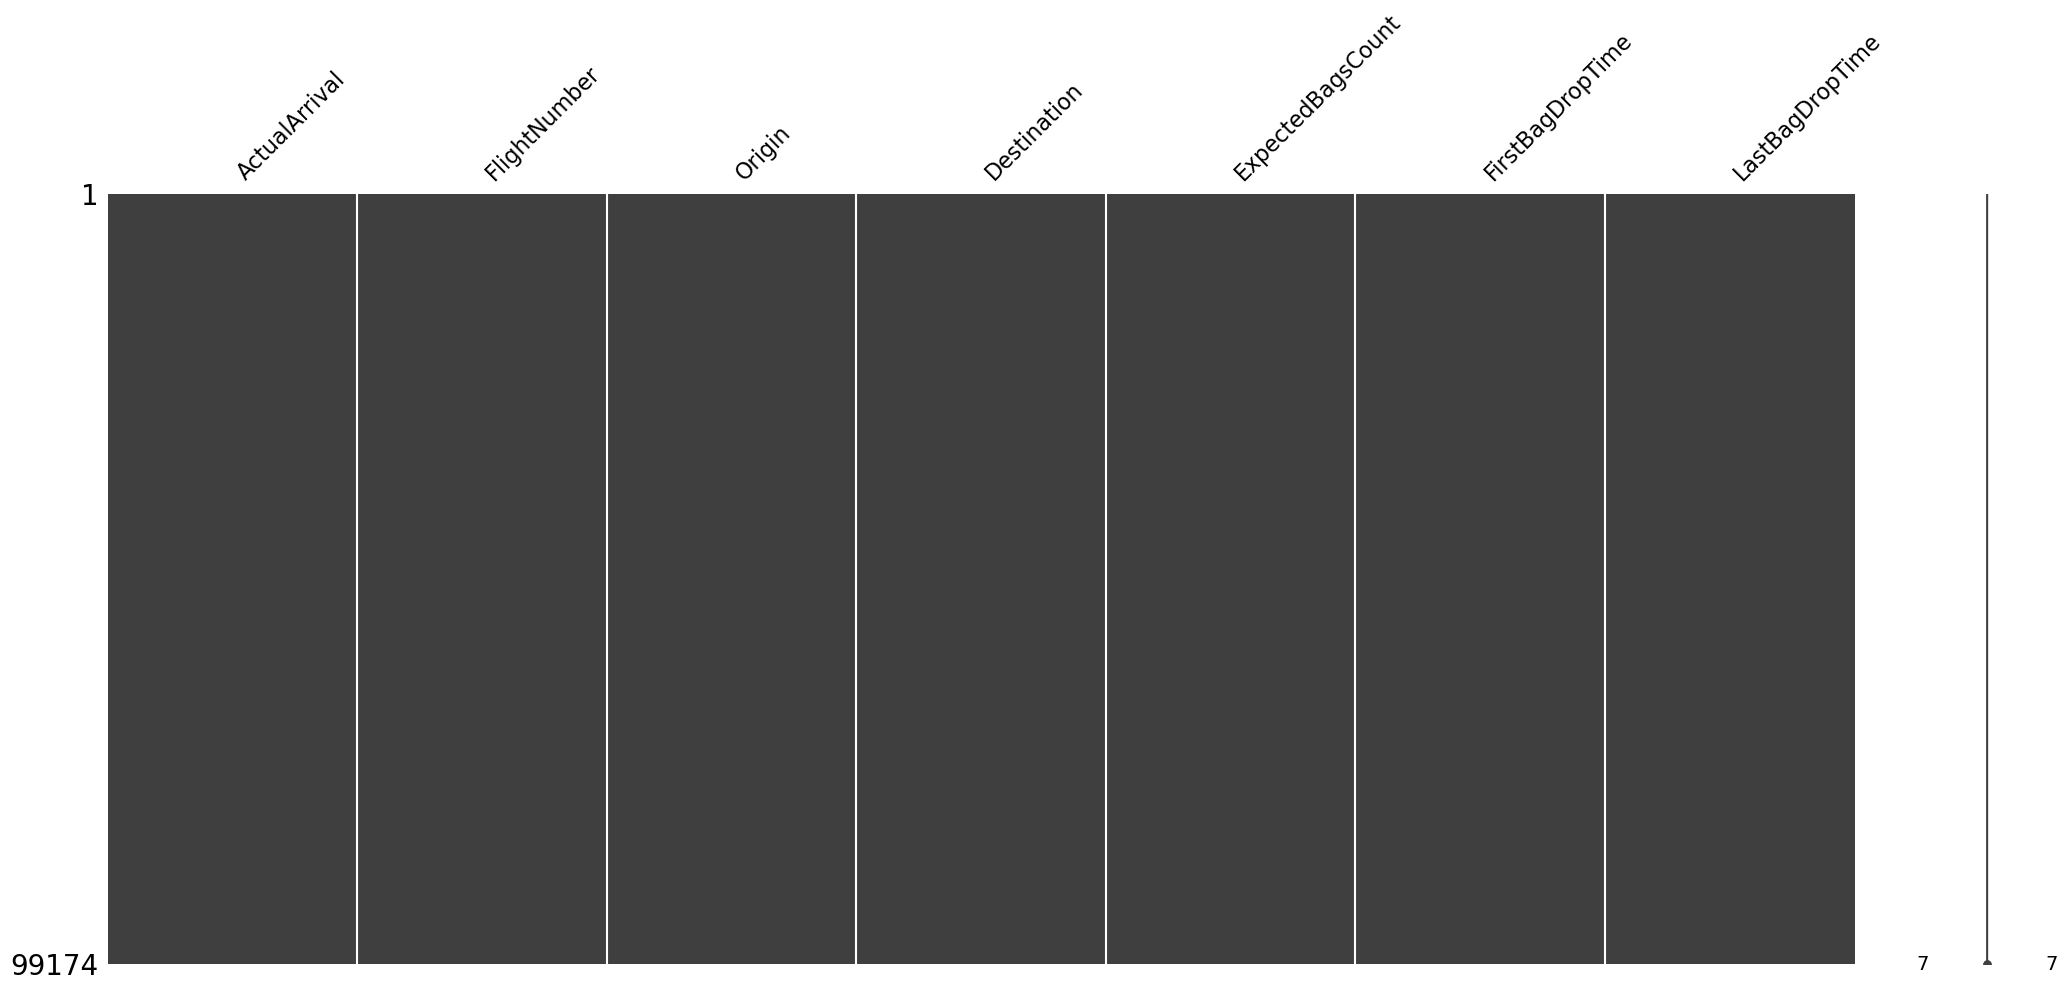

In [ ]:
# See if key columns like LastBagDropTime or ActualArrival are missing or partially filled.
msno.matrix(df)

No missing or partial value in any records

Duplicate Check
- Dropping the duplicate records

In [ ]:
# Checking for duplicate rows
print(df.duplicated().sum())

8380


In [ ]:
# Dropping duplicate columns
df1=df.drop_duplicates()

# Checking new dataframe
df1

,ActualArrival,FlightNumber,Origin,Destination,ExpectedBagsCount,FirstBagDropTime,LastBagDropTime
0,2021-07-22 08:20:00,8390,EVF,YZU,6,2021-07-22 08:29:00,2021-07-22 08:29:14
1,2021-07-22 08:20:00,6898,CYT,YZU,24,2021-07-22 08:30:09,2021-07-22 08:31:46
2,2021-07-22 08:20:00,3095,YZU,EVF,27,2021-07-22 08:26:30,2021-07-22 08:29:04
3,2021-07-22 08:31:00,4821,CYT,YUX,17,2021-07-22 08:41:58,2021-07-22 08:45:57
4,2021-07-22 08:33:00,2512,EYT,YZU,32,2021-07-22 08:40:51,2021-07-22 08:42:34
...,...,...,...,...,...,...,...
99169,2022-08-12 06:26:00,711,FXX,FTU,49,2022-08-12 06:50:48,2022-08-12 06:53:10
99170,2022-08-12 07:00:00,254,FTU,WET,31,2022-08-12 07:06:59,2022-08-12 07:08:11
99171,2022-08-12 07:02:00,648,WWT,VYZ,72,2022-08-12 07:12:45,2022-08-12 07:16:08
99172,2022-08-12 07:14:00,5337,WET,WWA,14,2022-08-12 07:23:33,2022-08-12 07:25:03


In [ ]:
# Filter rows where LastBagDropTime is earlier than FirstBagDropTime
invalid_bag_drop = df1[df1['LastBagDropTime'] < df1['FirstBagDropTime']]

print(invalid_bag_drop)

Empty DataFrame
Columns: [ActualArrival, FlightNumber, Origin, Destination, ExpectedBagsCount, FirstBagDropTime, LastBagDropTime]
Index: []


In [ ]:
# Filter rows where LastBagDropTime is earlier than ActualArrival
invalid_bag_drop = df1[df1['FirstBagDropTime'] < df1['ActualArrival']]

print(invalid_bag_drop)

Empty DataFrame
Columns: [ActualArrival, FlightNumber, Origin, Destination, ExpectedBagsCount, FirstBagDropTime, LastBagDropTime]
Index: []


In [ ]:
# Filter rows where LastBagDropTime is earlier than ActualArrival
invalid_bag_drop = df1[df1['LastBagDropTime'] < df1['ActualArrival']]

print(invalid_bag_drop)

Empty DataFrame
Columns: [ActualArrival, FlightNumber, Origin, Destination, ExpectedBagsCount, FirstBagDropTime, LastBagDropTime]
Index: []


In [ ]:
# Filter rows where LastBagDropTime is equal to FirstBagDropTime
invalid_bag_drop = df1[df1['LastBagDropTime'] == df1['FirstBagDropTime']]

invalid_bag_drop

,ActualArrival,FlightNumber,Origin,Destination,ExpectedBagsCount,FirstBagDropTime,LastBagDropTime
58,2021-07-22 10:31:00,1985,WWC,FTU,0,2021-07-22 10:40:43,2021-07-22 10:40:43
68,2021-07-22 10:36:00,4201,DFX,FTU,2,2021-07-22 10:55:04,2021-07-22 10:55:04
191,2021-07-22 18:48:00,1075,AAW,XCB,1,2021-07-22 18:52:28,2021-07-22 18:52:28
204,2021-07-22 18:59:00,8825,XTV,FTU,2,2021-07-22 19:16:01,2021-07-22 19:16:01
273,2021-07-23 06:44:00,1681,FUX,FTU,4,2021-07-23 06:58:29,2021-07-23 06:58:29
...,...,...,...,...,...,...,...
98989,2022-07-18 06:25:00,640,WET,FTU,3,2022-07-18 06:33:59,2022-07-18 06:33:59
98991,2022-07-18 06:32:00,7332,EVT,FTU,1,2022-07-18 06:41:12,2022-07-18 06:41:12
99153,2022-08-10 08:44:00,1850,XWF,FUX,1,2022-08-10 08:52:06,2022-08-10 08:52:06
99165,2022-08-12 06:09:00,640,WET,FTU,1,2022-08-12 06:24:04,2022-08-12 06:24:04


Removing records where FirstBagDropTime and LastBagDropTime are equal with bags more than 0

In [ ]:
# Remove rows from df1 where the FirstBagDropTime is equal to LastBagDropTime and the ExpectedBagsCount is greater than 0
df1 = df1[~((df1['FirstBagDropTime'] == df1['LastBagDropTime']) & (df1['ExpectedBagsCount'] > 0))]

# Display the cleaned DataFrame
df1

,ActualArrival,FlightNumber,Origin,Destination,ExpectedBagsCount,FirstBagDropTime,LastBagDropTime
0,2021-07-22 08:20:00,8390,EVF,YZU,6,2021-07-22 08:29:00,2021-07-22 08:29:14
1,2021-07-22 08:20:00,6898,CYT,YZU,24,2021-07-22 08:30:09,2021-07-22 08:31:46
2,2021-07-22 08:20:00,3095,YZU,EVF,27,2021-07-22 08:26:30,2021-07-22 08:29:04
3,2021-07-22 08:31:00,4821,CYT,YUX,17,2021-07-22 08:41:58,2021-07-22 08:45:57
4,2021-07-22 08:33:00,2512,EYT,YZU,32,2021-07-22 08:40:51,2021-07-22 08:42:34
...,...,...,...,...,...,...,...
99169,2022-08-12 06:26:00,711,FXX,FTU,49,2022-08-12 06:50:48,2022-08-12 06:53:10
99170,2022-08-12 07:00:00,254,FTU,WET,31,2022-08-12 07:06:59,2022-08-12 07:08:11
99171,2022-08-12 07:02:00,648,WWT,VYZ,72,2022-08-12 07:12:45,2022-08-12 07:16:08
99172,2022-08-12 07:14:00,5337,WET,WWA,14,2022-08-12 07:23:33,2022-08-12 07:25:03


In [ ]:
# Calculate baggage delivery time in minutes
df1['BaggageDeliveryTime'] = (df1['LastBagDropTime'] - df1['ActualArrival']).dt.total_seconds() / 60

# Check the dataframe
df1

,ActualArrival,FlightNumber,Origin,Destination,ExpectedBagsCount,FirstBagDropTime,LastBagDropTime,BaggageDeliveryTime
0,2021-07-22 08:20:00,8390,EVF,YZU,6,2021-07-22 08:29:00,2021-07-22 08:29:14,9.233333
1,2021-07-22 08:20:00,6898,CYT,YZU,24,2021-07-22 08:30:09,2021-07-22 08:31:46,11.766667
2,2021-07-22 08:20:00,3095,YZU,EVF,27,2021-07-22 08:26:30,2021-07-22 08:29:04,9.066667
3,2021-07-22 08:31:00,4821,CYT,YUX,17,2021-07-22 08:41:58,2021-07-22 08:45:57,14.950000
4,2021-07-22 08:33:00,2512,EYT,YZU,32,2021-07-22 08:40:51,2021-07-22 08:42:34,9.566667
...,...,...,...,...,...,...,...,...
99169,2022-08-12 06:26:00,711,FXX,FTU,49,2022-08-12 06:50:48,2022-08-12 06:53:10,27.166667
99170,2022-08-12 07:00:00,254,FTU,WET,31,2022-08-12 07:06:59,2022-08-12 07:08:11,8.183333
99171,2022-08-12 07:02:00,648,WWT,VYZ,72,2022-08-12 07:12:45,2022-08-12 07:16:08,14.133333
99172,2022-08-12 07:14:00,5337,WET,WWA,14,2022-08-12 07:23:33,2022-08-12 07:25:03,11.050000


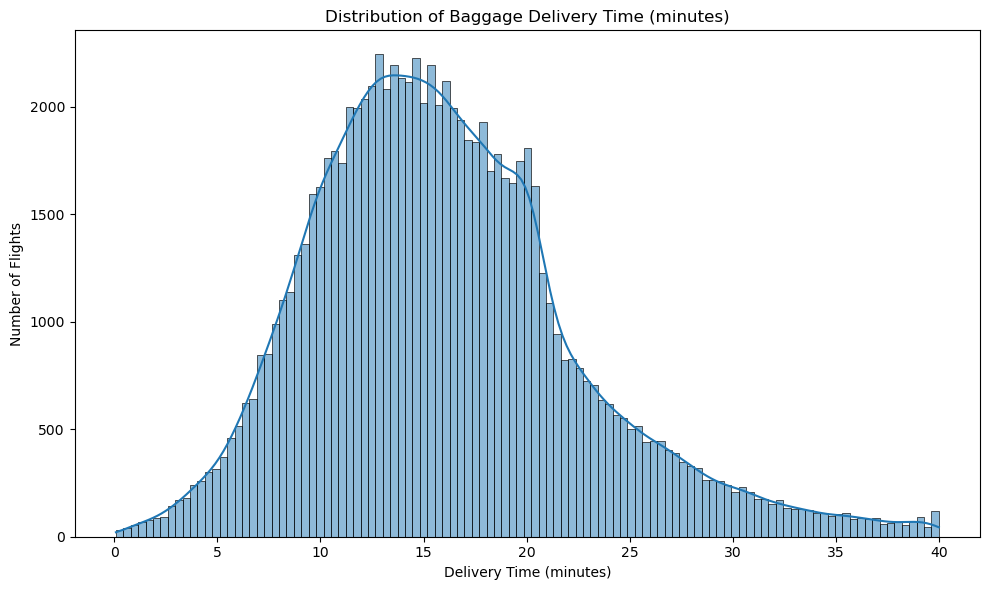

In [ ]:
# Visualizations for data quality and distribution
# Histogram of Baggage Delivery Time
plt.figure(figsize=(10,6))
sns.histplot(df1['BaggageDeliveryTime'], kde=True)
plt.title("Distribution of Baggage Delivery Time (minutes)")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Flights")
plt.tight_layout()
plt.show()

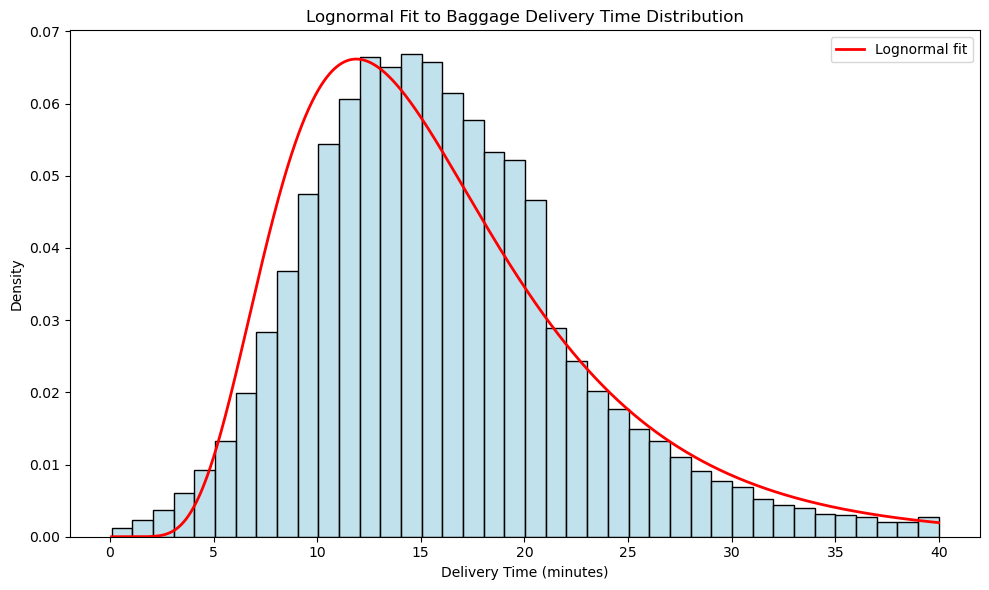

In [ ]:
# Fit a lognormal distribution to the BaggageDeliveryTime data
shape, loc, scale = stats.lognorm.fit(df1['BaggageDeliveryTime'], floc=0)

# Generate the x values for plotting
x = np.linspace(df1['BaggageDeliveryTime'].min(), df1['BaggageDeliveryTime'].max(), 1000)

# Generate the PDF of the lognormal distribution
pdf = stats.lognorm.pdf(x, shape, loc, scale)

# Plot the histogram and lognormal PDF
plt.figure(figsize=(10, 6))
sns.histplot(df1['BaggageDeliveryTime'], kde=False, bins=40, color='lightblue', stat='density')
plt.plot(x, pdf, 'r-', label='Lognormal fit', linewidth=2)
plt.title("Lognormal Fit to Baggage Delivery Time Distribution")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

Removing the outliers

In [ ]:
def remove_outliers_iqr_baggage_time(dataframe):
    col = 'BaggageDeliveryTime'
    df_no_outliers = dataframe.copy()

    if col in df_no_outliers.columns:
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Keep only rows within the IQR bounds
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

    return df_no_outliers

# Apply the function
df1 = remove_outliers_iqr_baggage_time(df1)

# View result
print(df1.shape)

(87393, 8)


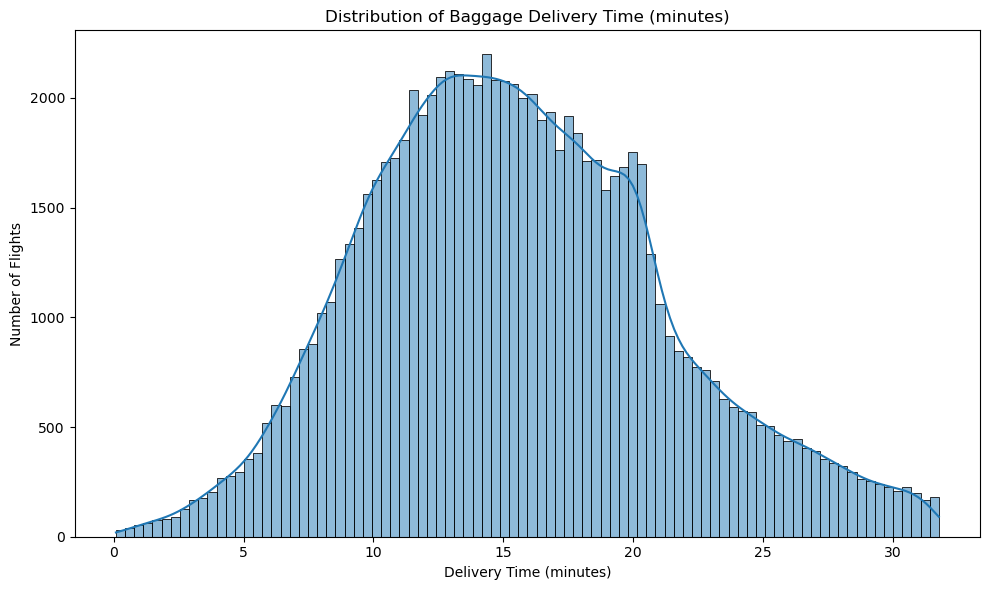

In [ ]:
# Visualizations for data quality and distribution
# Histogram of Baggage Delivery Time
plt.figure(figsize=(10,6))
sns.histplot(df1['BaggageDeliveryTime'], kde=True)
plt.title("Distribution of Baggage Delivery Time (minutes)")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Flights")
plt.tight_layout()
plt.show()

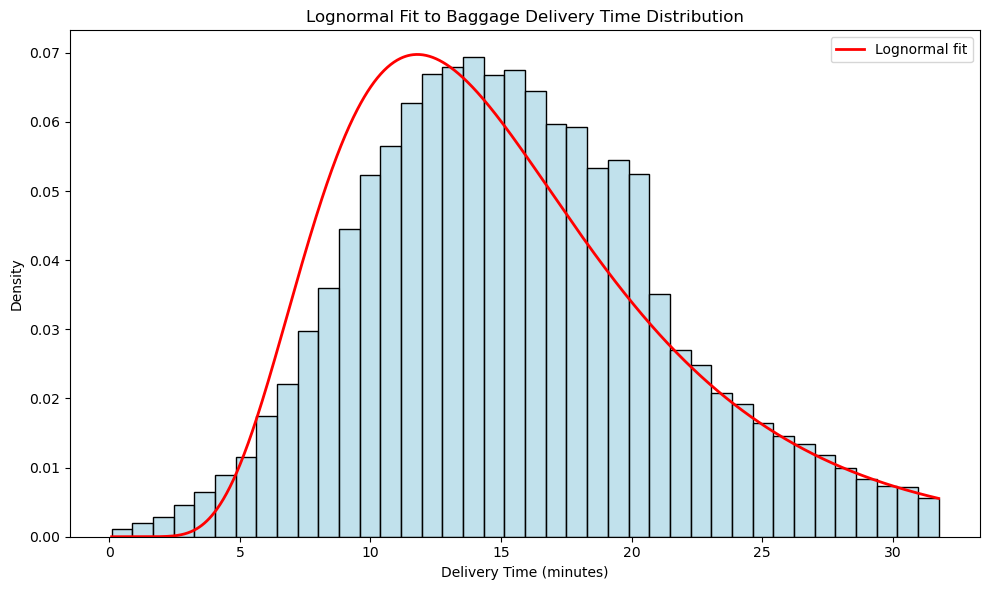

In [ ]:
# Fit a lognormal distribution to the BaggageDeliveryTime data
shape, loc, scale = stats.lognorm.fit(df1['BaggageDeliveryTime'], floc=0)

# Generate the x values for plotting
x = np.linspace(df1['BaggageDeliveryTime'].min(), df1['BaggageDeliveryTime'].max(), 1000)

# Generate the PDF of the lognormal distribution
pdf = stats.lognorm.pdf(x, shape, loc, scale)

# Plot the histogram and lognormal PDF
plt.figure(figsize=(10, 6))
sns.histplot(df1['BaggageDeliveryTime'], kde=False, bins=40, color='lightblue', stat='density')
plt.plot(x, pdf, 'r-', label='Lognormal fit', linewidth=2)
plt.title("Lognormal Fit to Baggage Delivery Time Distribution")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Export to Excel
df1.to_excel('Project Data_2025_cleaned.xlsx', index=False)

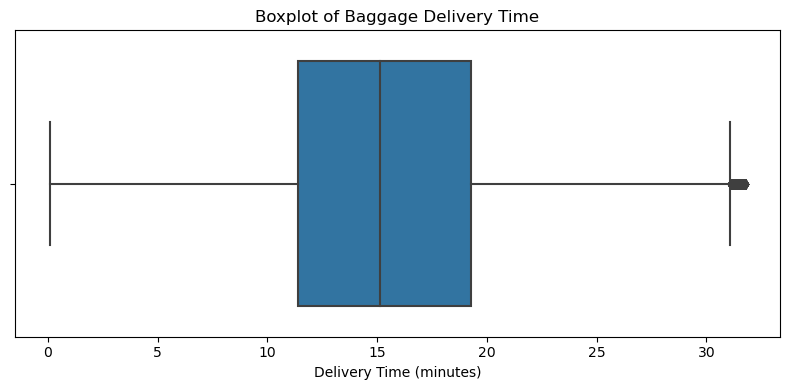

In [ ]:
# Boxplot of BaggageDeliveryTime
plt.figure(figsize=(8, 4))
sns.boxplot(x=df1['BaggageDeliveryTime'])
plt.title("Boxplot of Baggage Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.tight_layout()
plt.show()

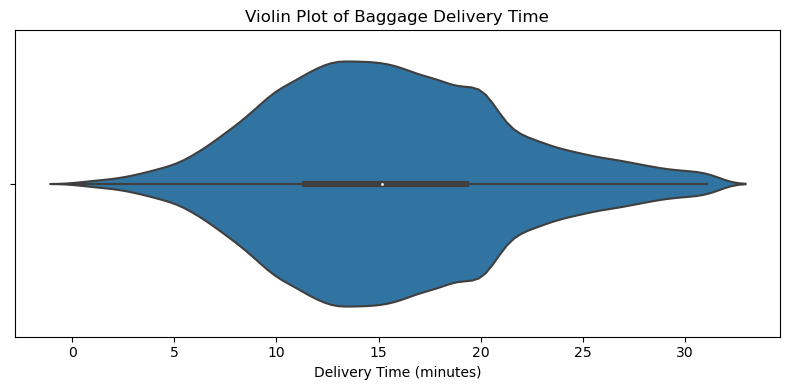

In [ ]:
# Violin plot
plt.figure(figsize=(8, 4))
sns.violinplot(x=df1['BaggageDeliveryTime'])
plt.title("Violin Plot of Baggage Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.tight_layout()
plt.show()

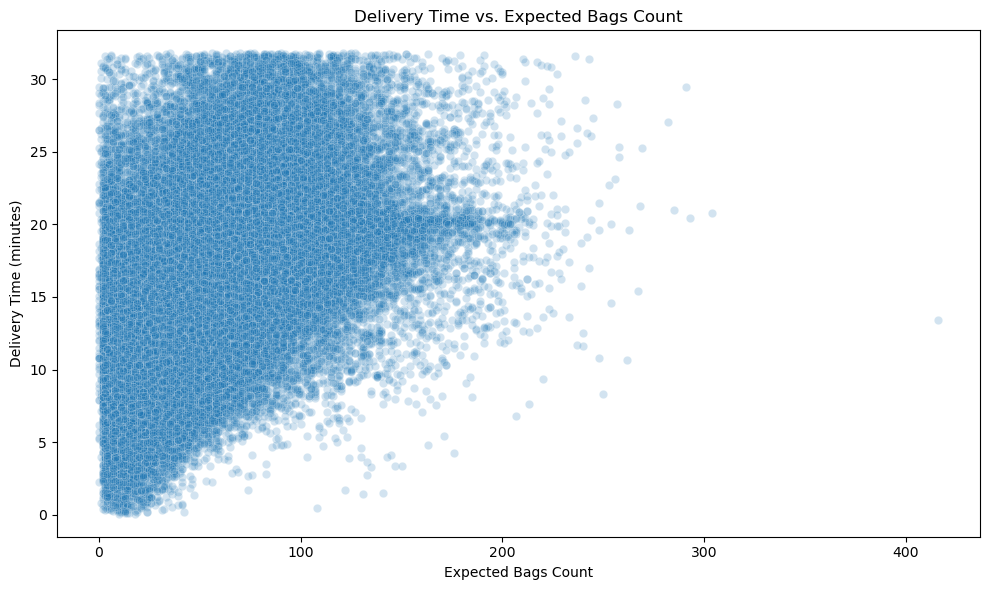

In [ ]:
# Scatter: Delivery Time vs Expected Bags Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['ExpectedBagsCount'], y=df1['BaggageDeliveryTime'], alpha=0.2)
plt.title("Delivery Time vs. Expected Bags Count")
plt.xlabel("Expected Bags Count")
plt.ylabel("Delivery Time (minutes)")
plt.tight_layout()
plt.show()

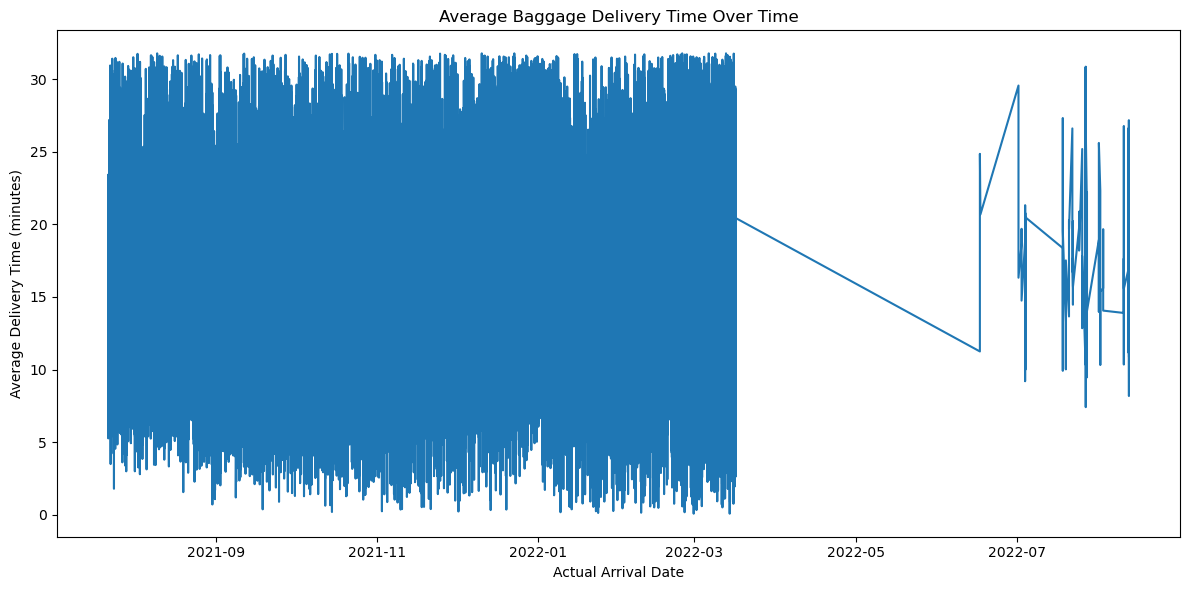

In [ ]:
# Time series: Baggage Delivery Time over ActualArrival
plt.figure(figsize=(12, 6))
sns.lineplot(x=df1['ActualArrival'], y=df1['BaggageDeliveryTime'], ci=None, estimator='mean')
plt.title("Average Baggage Delivery Time Over Time")
plt.xlabel("Actual Arrival Date")
plt.ylabel("Average Delivery Time (minutes)")
plt.tight_layout()
plt.show()

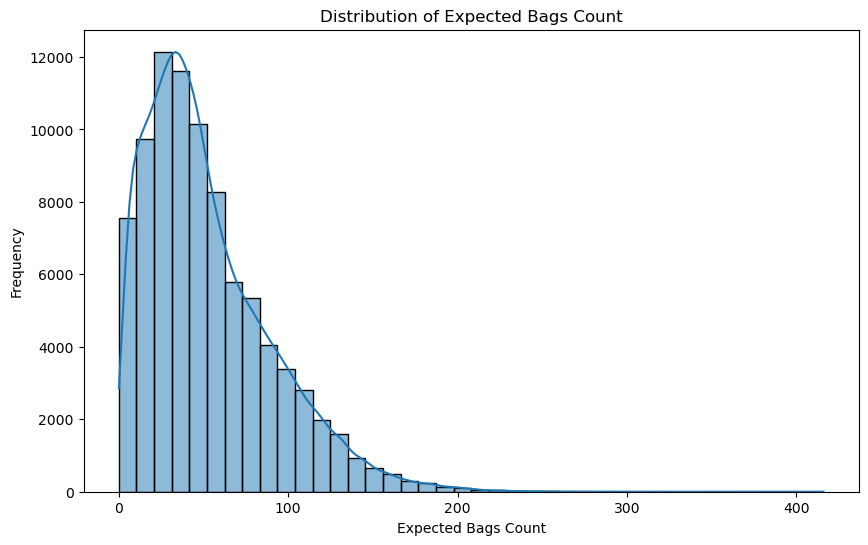

In [ ]:
# Histogram: Expected Bags Count
plt.figure(figsize=(10, 6))
sns.histplot(df1['ExpectedBagsCount'], bins=40, kde=True)
plt.title('Distribution of Expected Bags Count')
plt.xlabel('Expected Bags Count')
plt.ylabel('Frequency')
plt.show()

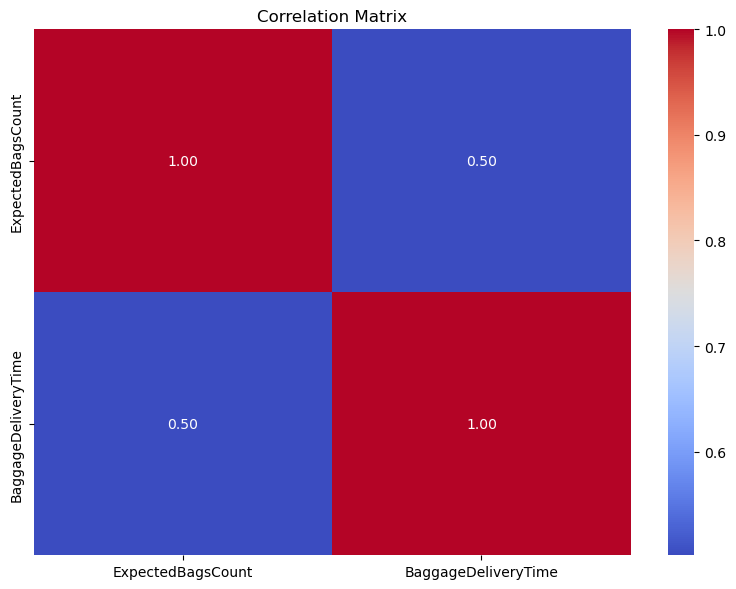

In [ ]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
corr = df1[['ExpectedBagsCount', 'BaggageDeliveryTime']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

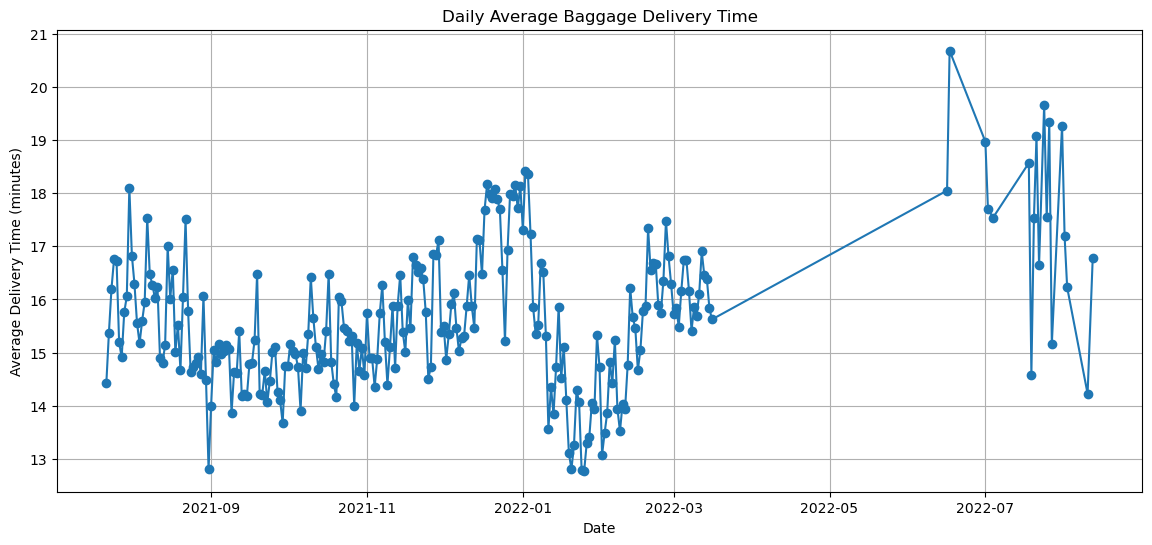

In [ ]:
# Line Chart: Daily Average Delivery Time
df1['ActualArrivalDate'] = df1['ActualArrival'].dt.date
daily_avg = df1.groupby('ActualArrivalDate')['BaggageDeliveryTime'].mean()

plt.figure(figsize=(14, 6))
daily_avg.plot(marker='o')
plt.title('Daily Average Baggage Delivery Time')
plt.xlabel('Date')
plt.ylabel('Average Delivery Time (minutes)')
plt.grid(True)
plt.show()

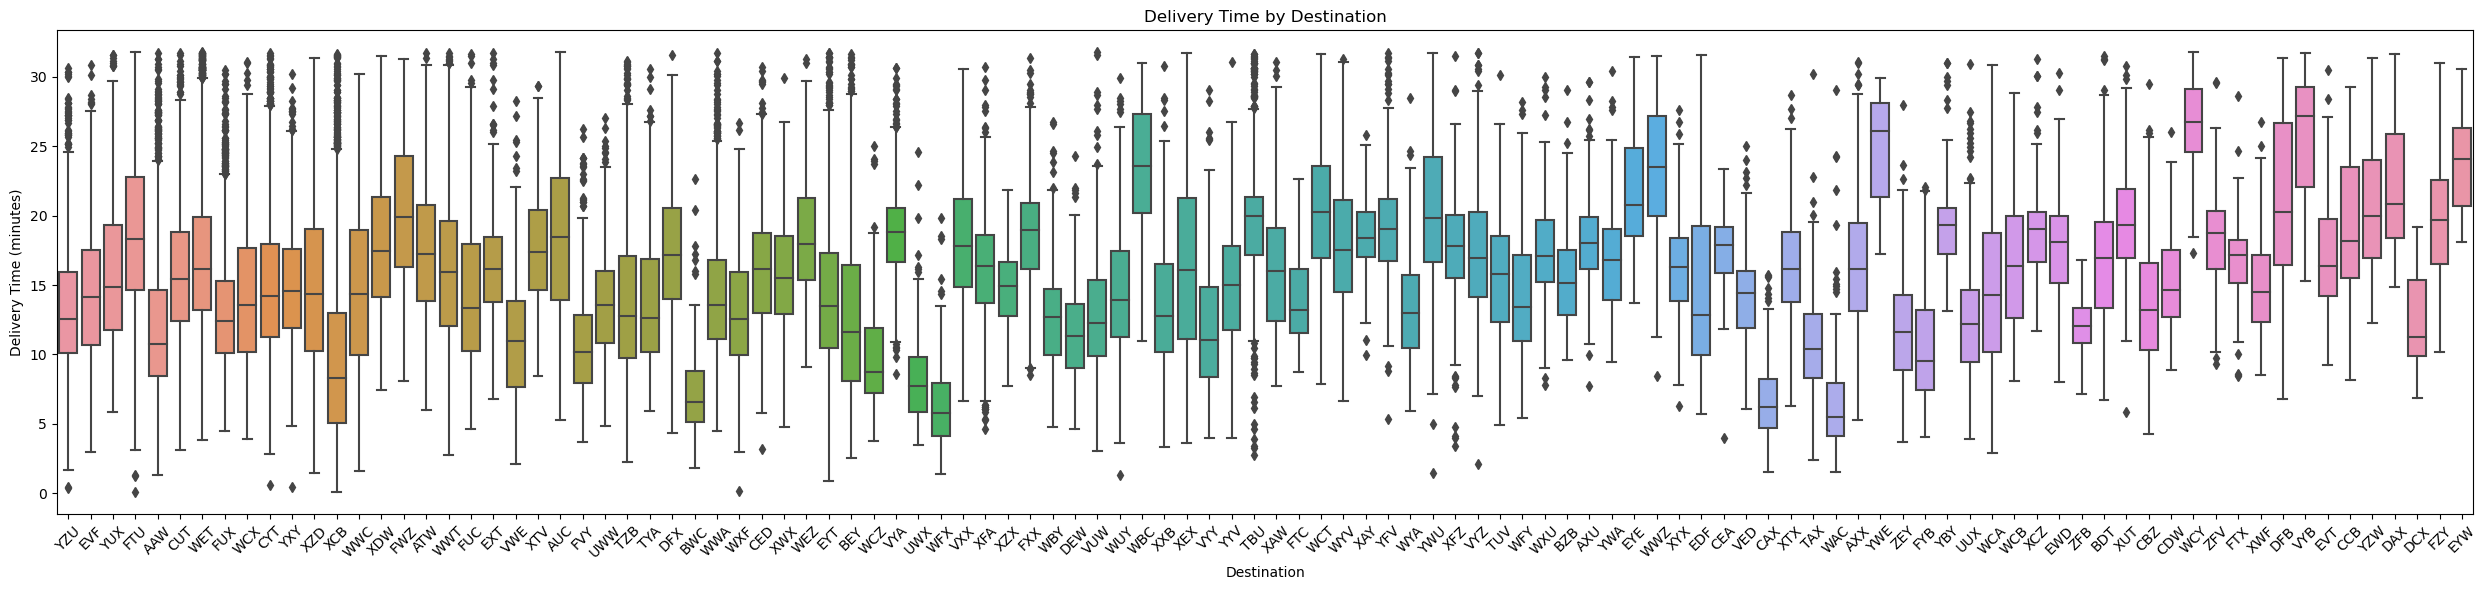

In [ ]:
plt.figure(figsize=(25, 6))
sns.boxplot(x='Destination', y='BaggageDeliveryTime', data=df1)
plt.title('Delivery Time by Destination')
plt.xlabel('Destination')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

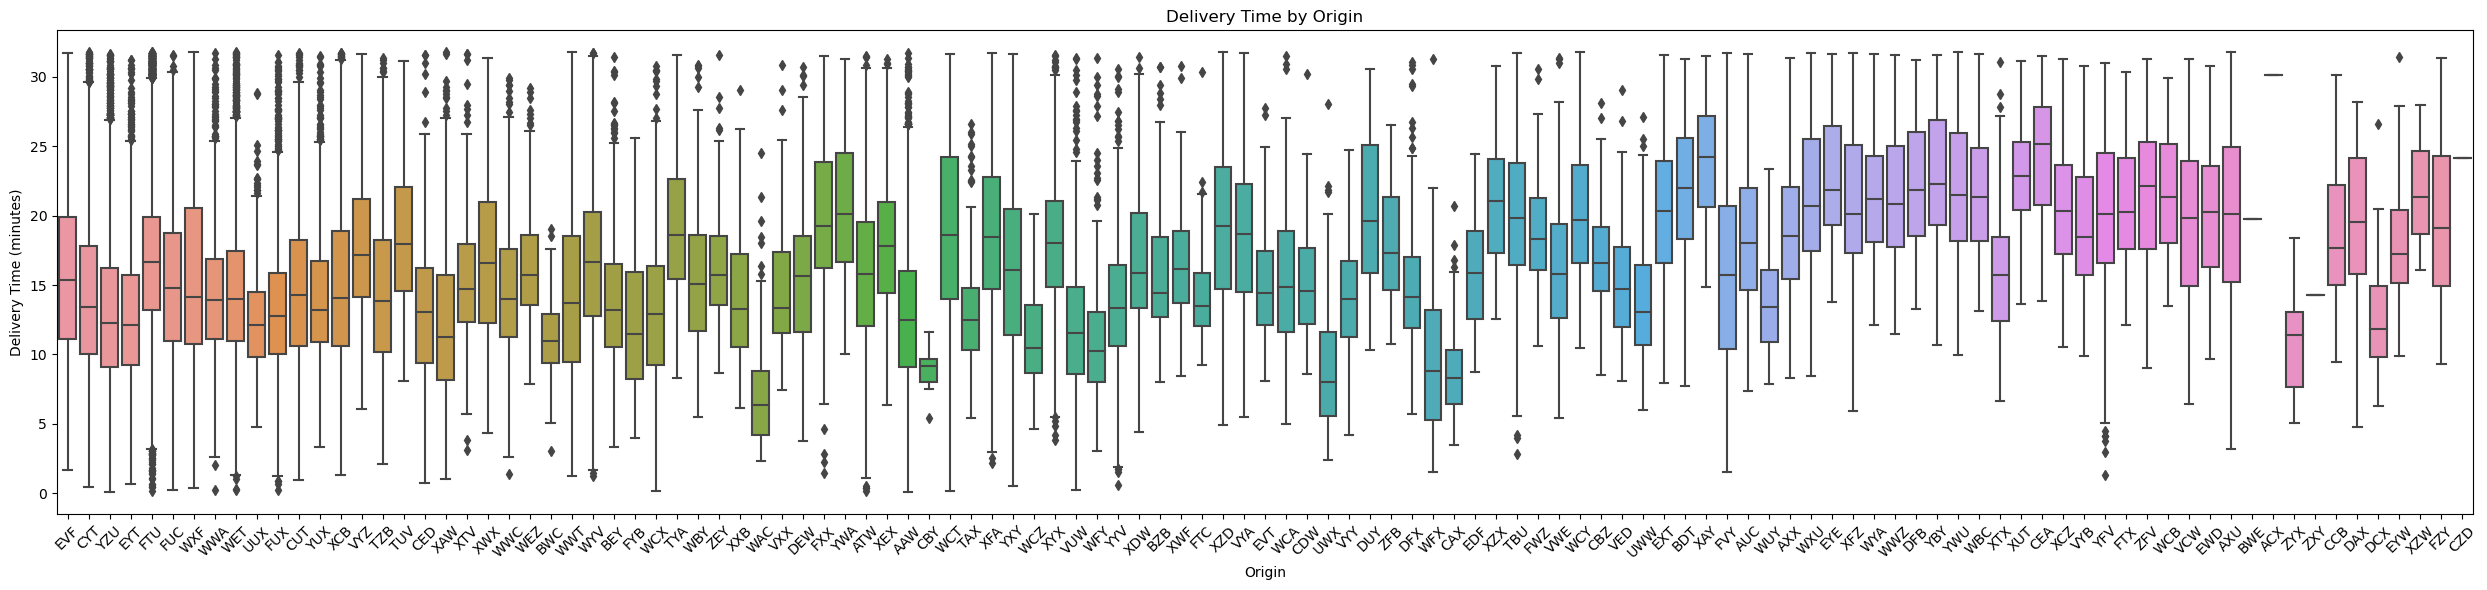

In [ ]:
plt.figure(figsize=(25, 6))
sns.boxplot(x='Origin', y='BaggageDeliveryTime', data=df1)
plt.title('Delivery Time by Origin')
plt.xlabel('Origin')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

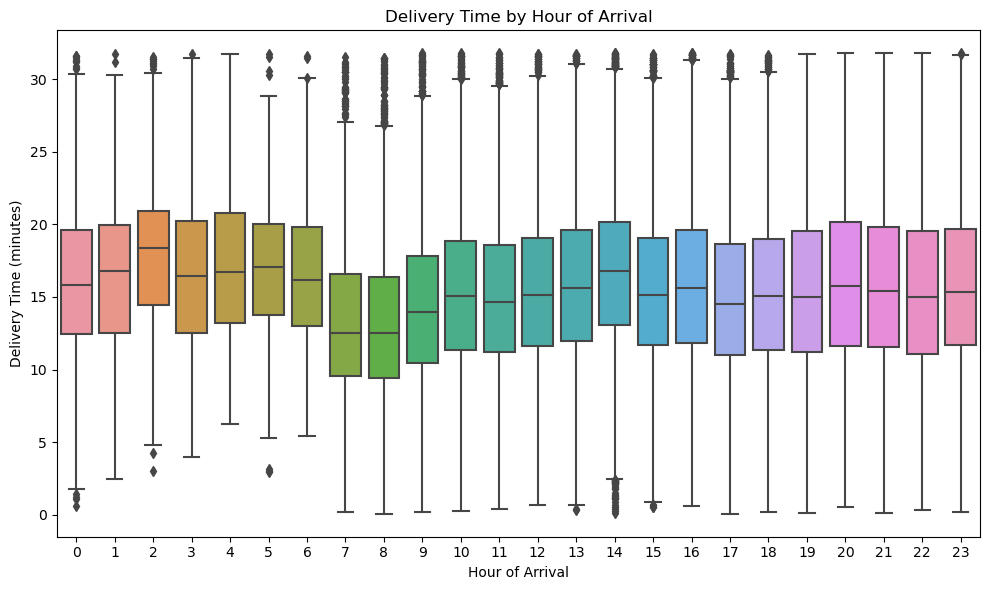

In [ ]:
df1['ArrivalHour'] = df1['ActualArrival'].dt.hour

plt.figure(figsize=(10, 6))
sns.boxplot(x='ArrivalHour', y='BaggageDeliveryTime', data=df1)
plt.title('Delivery Time by Hour of Arrival')
plt.xlabel('Hour of Arrival')
plt.ylabel('Delivery Time (minutes)')
plt.tight_layout()
plt.show()

#This can highlight any peak hours where delays are more likely to occur.

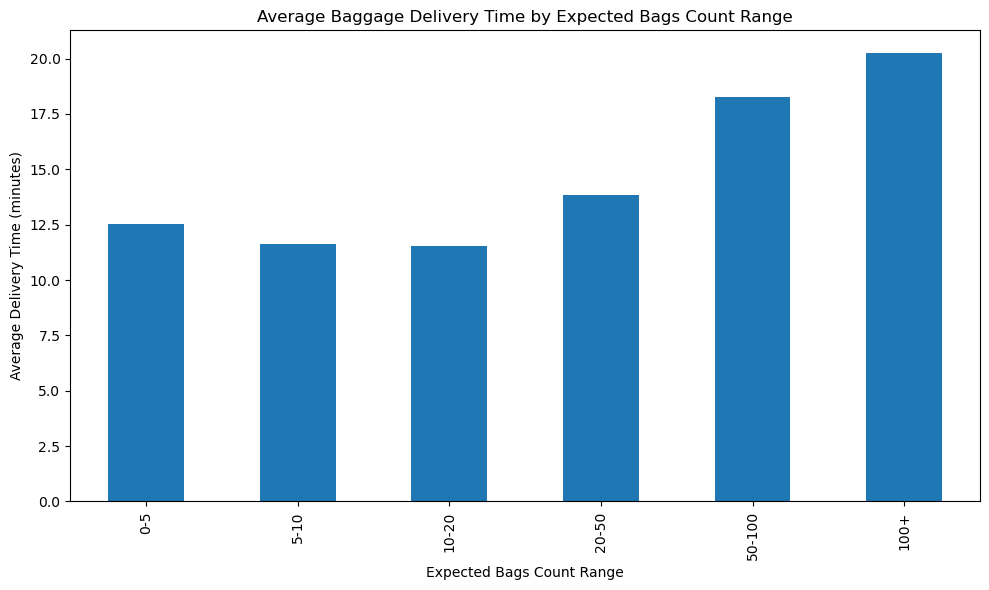

In [ ]:
# Create bins for ExpectedBagsCount
bins = [0, 5, 10, 20, 50, 100, 200]
labels = ['0-5', '5-10', '10-20', '20-50', '50-100', '100+']
df1['BagsCountRange'] = pd.cut(df1['ExpectedBagsCount'], bins=bins, labels=labels)

# Create stacked bar plot
plt.figure(figsize=(10, 6))
df1.groupby('BagsCountRange')['BaggageDeliveryTime'].mean().plot(kind='bar', stacked=False)
plt.title('Average Baggage Delivery Time by Expected Bags Count Range')
plt.xlabel('Expected Bags Count Range')
plt.ylabel('Average Delivery Time (minutes)')
plt.tight_layout()
plt.show()

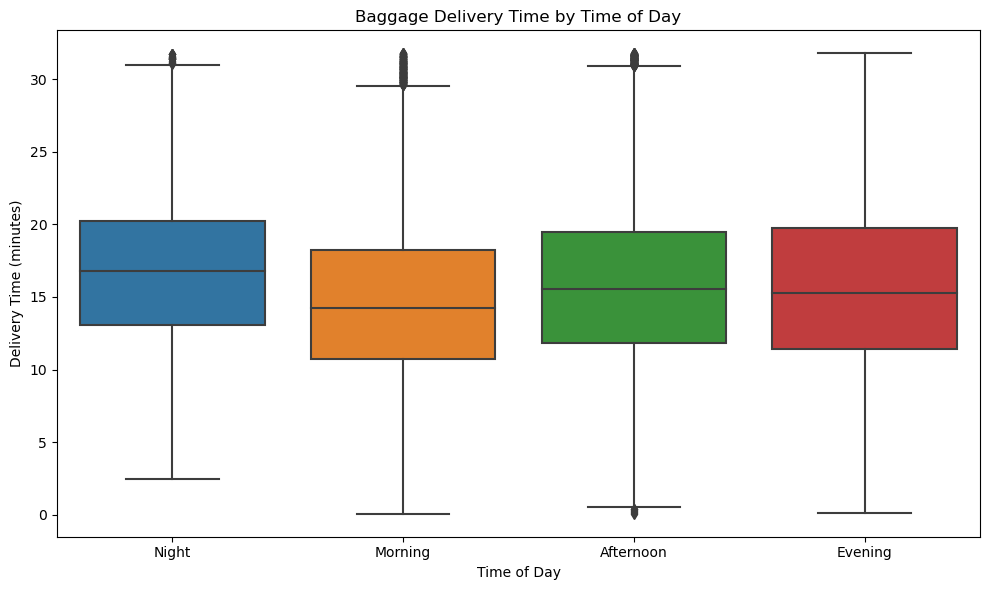

In [ ]:
df1['TimeOfDay'] = df1['ActualArrival'].dt.hour
df1['TimeOfDay'] = pd.cut(df1['TimeOfDay'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='TimeOfDay', y='BaggageDeliveryTime', data=df1)
plt.title('Baggage Delivery Time by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Delivery Time (minutes)')
plt.tight_layout()
plt.show()

# This could identify whether certain times of day lead to faster or slower delivery.

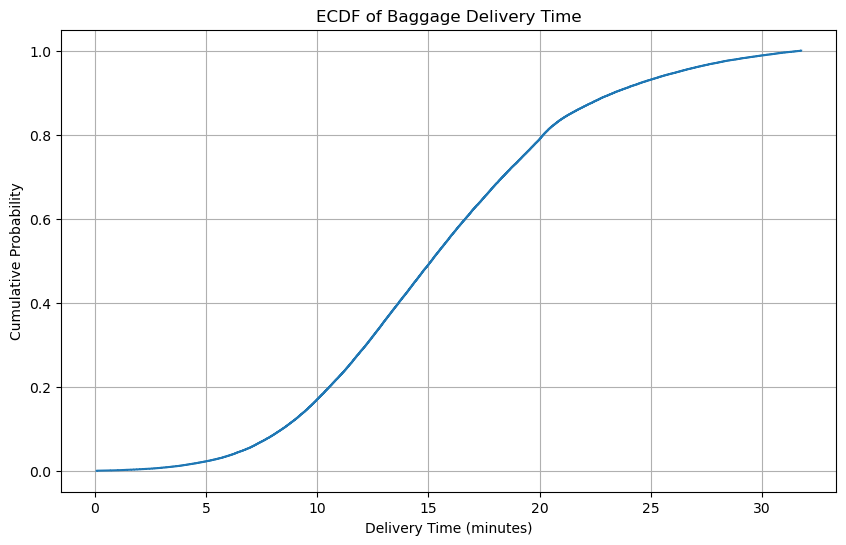

In [ ]:
# ECDF plot
ecdf = ECDF(df1['BaggageDeliveryTime'].dropna())
plt.figure(figsize=(10, 6))
plt.plot(ecdf.x, ecdf.y)
plt.title('ECDF of Baggage Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

In [ ]:
# Descriptive statistics
print("\nDescriptive statistics for Baggage Delivery Time:")
print(df1['BaggageDeliveryTime'].describe())


Descriptive statistics for Baggage Delivery Time:
count    87393.000000
mean        15.541454
std          5.784345
min          0.083333
25%         11.416667
50%         15.150000
75%         19.283333
max         31.766667
Name: BaggageDeliveryTime, dtype: float64


In [ ]:
# Normality test
sample = df1['BaggageDeliveryTime'].dropna().sample(5000, random_state=42) if len(df1) > 5000 else df1['BaggageDeliveryTime'].dropna()
shapiro_stat, shapiro_p = shapiro(sample)
print(f"\nShapiro-Wilk test for normality (sample): W={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")
if shapiro_p < 0.05:
    print("The distribution is significantly different from normal (p < 0.05).")
else:
    print("The distribution does not significantly differ from normal (p >= 0.05).")


Shapiro-Wilk test for normality (sample): W=0.9876, p-value=0.0000
The distribution is significantly different from normal (p < 0.05).


In [ ]:
# Empirical probability: delivery time < 21 minutes
threshold = 21
empirical_prob = (df1['BaggageDeliveryTime'] < threshold).mean()
print(f"\nEmpirical probability that delivery time < {threshold} minutes: {empirical_prob:.4f}")


Empirical probability that delivery time < 21 minutes: 0.8371


In [ ]:
# Theoretical probability using Normal approximation
delivery_mean = df1['BaggageDeliveryTime'].mean()
delivery_std = df1['BaggageDeliveryTime'].std()
theoretical_prob = norm.cdf(threshold, loc=delivery_mean, scale=delivery_std)
print(f"Theoretical probability (Normal approx.) that delivery time < {threshold} minutes: {theoretical_prob:.4f}")

Theoretical probability (Normal approx.) that delivery time < 21 minutes: 0.8273
